# 0. Import libraries and Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("../raw_data/global_crisis_data_country_csv.csv", encoding='unicode_escape')

In [4]:
print(data.shape)
data.head()

(15191, 27)


,Case,CC3,Country,Year,Banking Crisis,Banking_Crisis_Notes,Systemic Crisis,Gold Standard,exch_usd,exch_usd_alt1,...,Domestic_Debt_ Notes/Sources,"SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors","SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors",Defaults_External_Notes,GDP_Weighted_default,<,"Inflation, Annual percentages of average consumer prices",Independence,Currency Crises,Inflation Crises
0,NaN,NaN,NaN,NaN,x,NaN,x,x,NaN,NaN,...,NaN,x,NaN,NaN,x,x,NaN,x,x,x
1,1.0,DZA,Algeria,1800.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
2,1.0,DZA,Algeria,1801.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
3,1.0,DZA,Algeria,1802.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0
4,1.0,DZA,Algeria,1803.0,0,NaN,0,0,NaN,NaN,...,NaN,0,0.0,NaN,0,NaN,NaN,0,0,0


In [5]:
data.columns

Index(['Case', 'CC3', 'Country', 'Year', 'Banking Crisis ',
       'Banking_Crisis_Notes', 'Systemic Crisis', 'Gold Standard', 'exch_usd',
       'exch_usd_alt1', 'exch_usd_alt2', 'exch_usd_alt3', 'conversion_notes',
       'national currency', 'exch_primary source code', 'exch_sources',
       'Domestic_Debt_In_Default', 'Domestic_Debt_ Notes/Sources',
       'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors',
       'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors',
       'Defaults_External_Notes', 'GDP_Weighted_default', '<',
       'Inflation, Annual percentages of average consumer prices',
       'Independence', 'Currency Crises', 'Inflation Crises'],
      dtype='object')

In [6]:
data.rename(columns={'Banking Crisis ':'banking_crisis',
                    'Systemic Crisis':'systemic_crisis',
                    'Banking_Crisis_Notes':'notes',
                    'Gold Standard':'gold_standard',
                    'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors': 'sovereign_external_debt_1',
                    'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_external_debt_2',
                    'Inflation, Annual percentages of average consumer prices':'annual_inflation'},
            inplace = True)

In [7]:
data.drop(0, inplace = True)
data.shape

(15190, 27)

# 1. Description of the "Global Crises Data by Country" dataset

## 1.1 Get the number of crisis per country

In [8]:
nb_countries = data["Country"].nunique()
min_year = int(data["Year"].min())
max_year = int(data["Year"].max())
nb_observations = max_year - min_year +1
print(f"There are data of {nb_countries} countries in the dataset from {min_year} to {max_year}.")

There are data of 70 countries in the dataset from 1800 to 2016.


In [9]:
data['banking_crisis'] = pd.to_numeric(data['banking_crisis'], errors='coerce')
data['systemic_crisis'] = pd.to_numeric(data['systemic_crisis'], errors='coerce')
data['annual_inflation'] = pd.to_numeric(data['annual_inflation'], errors='coerce')

In [10]:
banking_crisis_per_country = data.groupby('Country')['banking_crisis'].sum().astype(int)
systemic_crisis_per_country = data.groupby('Country')['systemic_crisis'].sum().astype(int)
countries = data['CC3'].unique()

In [74]:
results = pd.DataFrame({
                     'banking_crisis_number': banking_crisis_per_country,
                    #  'systemic_crisis_number': systemic_crisis_per_country
                     })
results.sort_values(by='banking_crisis_number', ascending=False, inplace = True)

<BarContainer object of 70 artists>

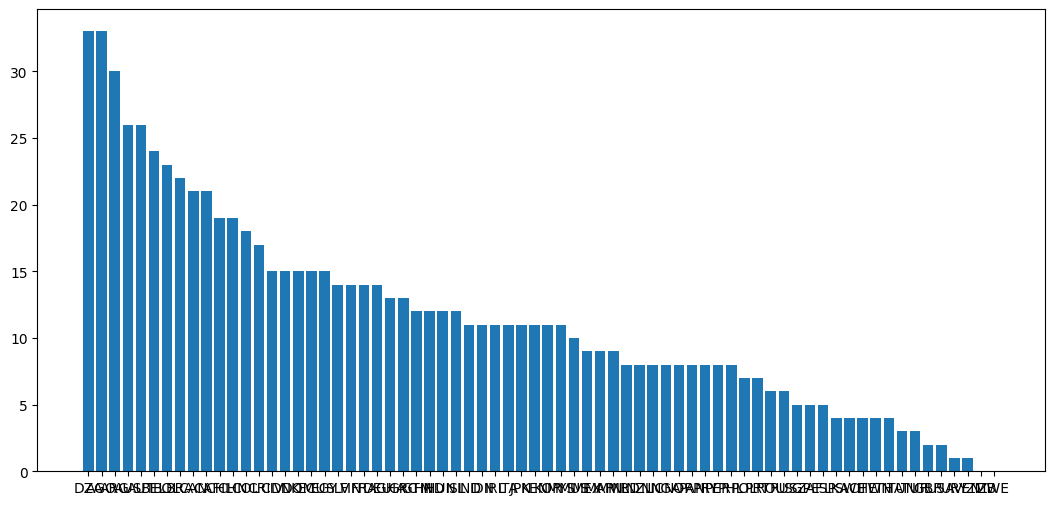

In [12]:
plt.figure(figsize=(13,6))
plt.bar(countries, results['banking_crisis_number'])

In [75]:
results.describe().round(1)

,banking_crisis_number
count,70.0
mean,11.5
std,7.6
min,0.0
25%,6.2
50%,11.0
75%,15.0
max,33.0


In [61]:
print(results.tail())
print(results.head())

             banking_crisis_number
Country                           
Panama                           2
Singapore                        1
Mauritius                        1
Switzerland                      0
Ireland                          0
                banking_crisis_number
Country                              
United States                      33
United Kingdom                     33
Spain                              30
France                             26
Italy                              26


## 1.2 Get the number of negative liquidity shock per country

### 1.2.1 Number of episode of deflation crisis

In [76]:
data['crisis_and_deflation'] = ((data['banking_crisis'] == 1) | (data['systemic_crisis'] == 1)) & (data['annual_inflation'] < 0)
deflations_crisis = data.groupby('Country')['crisis_and_deflation'].sum().astype(int)
deflations_crisis.sort_values(ascending = False, inplace = True)

In [80]:
deflations_crisis.describe().round(1)

count    70.0
mean      2.3
std       3.4
min       0.0
25%       0.0
50%       0.5
75%       4.0
max      14.0
Name: crisis_and_deflation, dtype: float64

### 1.2.3 Frequency of a negative demand shock from every year of the dataset

In [15]:
frequency = (deflations_crisis / nb_observations).round(2)
deflation = pd.DataFrame({'deflation episode' : deflations_crisis,
                          'frequency_deflation' : frequency})
deflation.sort_values(by ='deflation episode', ascending=False, inplace=True)

In [16]:
deflation['deflation episode'].mean()

2.342857142857143

In [81]:
countries_a = deflation.index[deflation['deflation episode']==2].tolist()
countries_a

['Ireland', 'Canada', 'Taiwan']

In [18]:
countries_b = deflation.index[deflation['deflation episode']==3].tolist()
countries_b

['Italy', 'Poland', 'Russia', 'Austria', 'Argentina', 'Hungary']

In [19]:
countries_c = deflation.head().index.tolist()
countries_c

['United States', 'United Kingdom', 'Japan', 'France', 'Sweden']

# 2. Look for specific negative demand shock episode

### 2.1 Focus on the USA (type c)

In [59]:
USA_data = data[data["CC3"]=='USA']

(-50.0, 50.0)

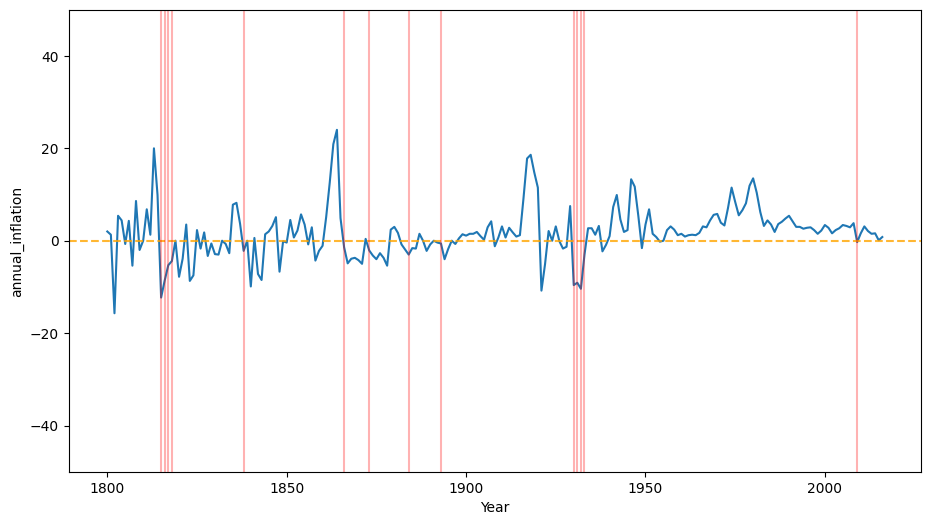

In [90]:
plt.figure(figsize=(11,6))
sns.lineplot(x=USA_data['Year'], y=USA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = USA_data[USA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.2 Focus on Italy (type b)

In [56]:
ITA_data = data[data["CC3"]=='ITA']

(-50.0, 50.0)

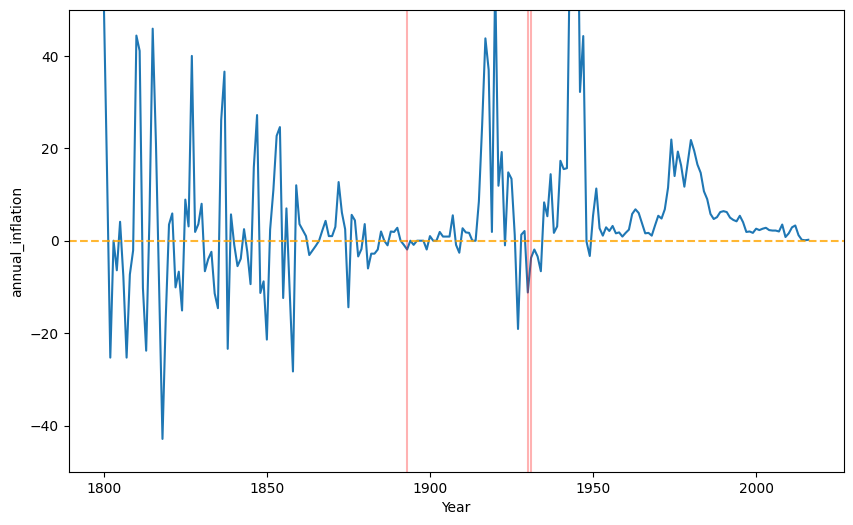

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(x=ITA_data['Year'], y=ITA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = ITA_data[ITA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.3 Focus on Finland (type a)

In [47]:
FIN_data = data[data["CC3"]=='FIN']

(-50.0, 50.0)

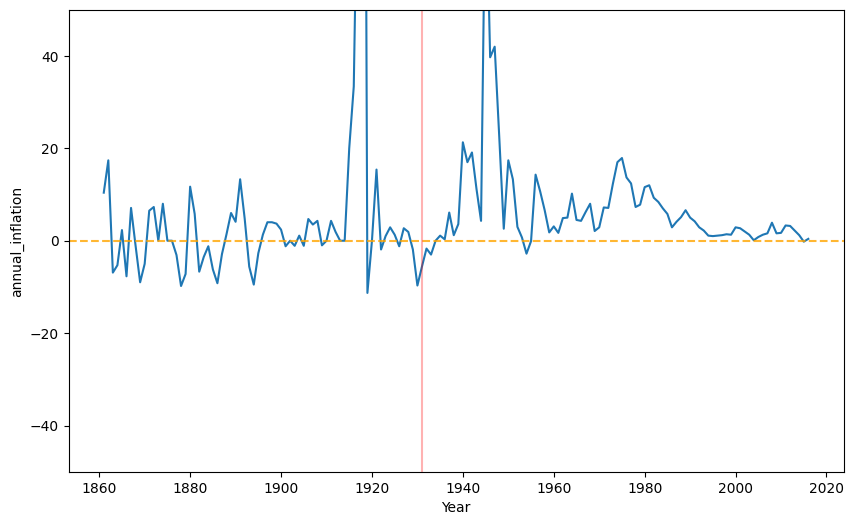

In [92]:
plt.figure(figsize=(10,6))
sns.lineplot(x=FIN_data['Year'], y=FIN_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0',linestyle = 'dashed', alpha = 0.8)
crisis_years = FIN_data[FIN_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.4 Focus on Japan (type c) 

In [51]:
JPN_data = data[data["CC3"]=='JPN']

(-50.0, 50.0)

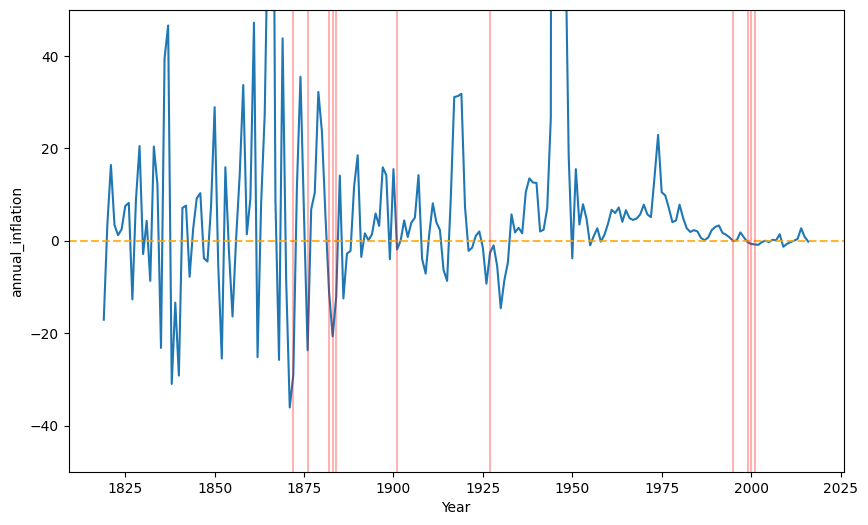

In [93]:
plt.figure(figsize=(10,6))
sns.lineplot(x=JPN_data['Year'], y=JPN_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0',linestyle = 'dashed', alpha = 0.8)
crisis_years = JPN_data[JPN_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.5 Focus on France

In [54]:
FRA_data = data[data["CC3"]=='FRA']

(-50.0, 50.0)

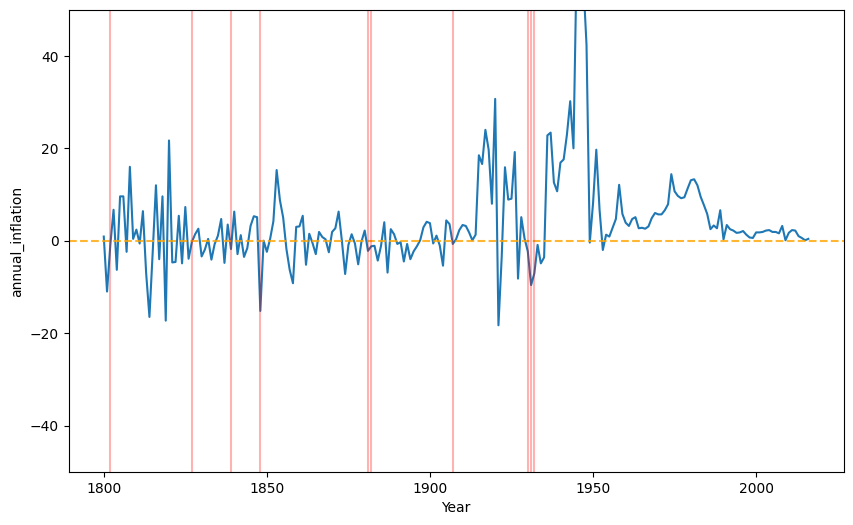

In [94]:
plt.figure(figsize=(10,6))
sns.lineplot(x=FRA_data['Year'], y=FRA_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = FRA_data[FRA_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

## 2.6. Focus on Argentina

In [133]:
ARG_data = data[data["CC3"]=='ARG']

(-50.0, 50.0)

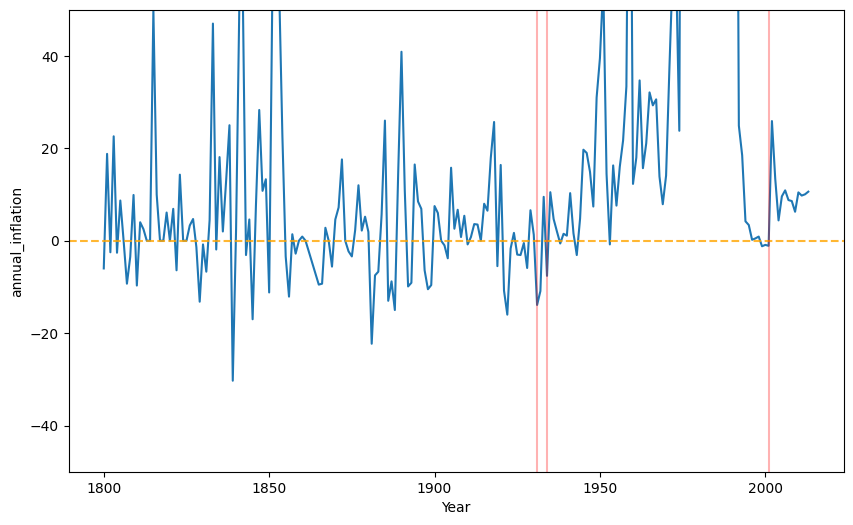

In [134]:
plt.figure(figsize=(10,6))
sns.lineplot(x=ARG_data['Year'], y=ARG_data['annual_inflation'])
plt.axhline(y=0, color='orange', label='y=0', linestyle = 'dashed', alpha = 0.8)
crisis_years = ARG_data[ARG_data['crisis_and_deflation'] == 1]['Year'].tolist()
for year in crisis_years:
    plt.axvline(x=year, color='red', linestyle='-', label='Crisis Period', alpha = 0.3)
plt.ylim(-50, 50)

### 2.1.1 The great Depression

- From the initial Dataset

In [136]:
selected_countries = ['USA', 'JPN', 'FRA', 'ITA', 'ARG']

In [139]:
great_depression = data[(data['Year']>=1928) & (data['Year']<=1940)][['Year', 'annual_inflation', 'Country', 'CC3', 'crisis_and_deflation']]
df = great_depression[great_depression['CC3'].isin(selected_countries)]

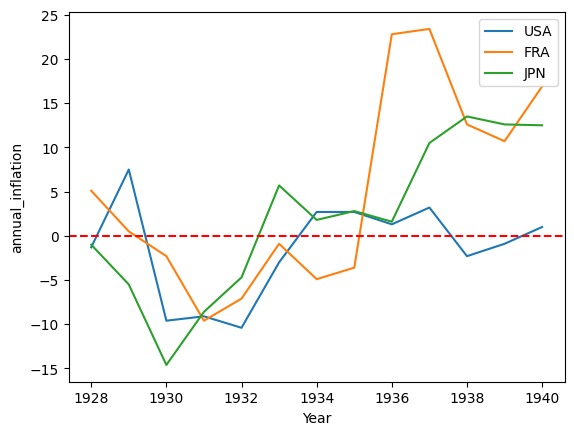

In [137]:
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='USA'], label = 'USA')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='FRA'], label = 'FRA')
# sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ITA'], label = 'ITA')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='JPN'], label = 'JPN')
plt.axhline(y=0, color='red',linestyle='--')
plt.legend()

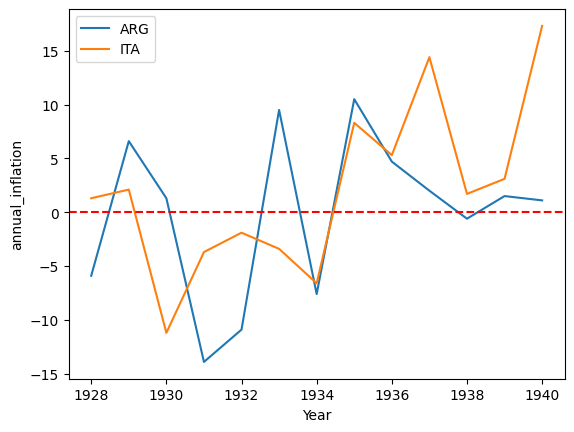

In [140]:
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ARG'], label = 'ARG')
sns.lineplot(x= 'Year',y='annual_inflation', data = df[df['CC3']=='ITA'], label = 'ITA')
plt.axhline(y=0, color='red',linestyle='--')
plt.legend()

- from a more precise quaterly dataset

In [23]:
USA_CPI = pd.read_csv('../raw_data/USA/USA_CPI.csv')